Read in the cleaned data and schema

In [2]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import defaultdict
import general_functions as gf
%matplotlib inline

df = pd.read_csv(r'C:\\Users\\Jessica\\Desktop\\School\\Udacity Data Science\\Lesson 1 - Data Science Process\\Project 1\\reduced_data.csv', sep=',', error_bad_lines=False, index_col=False)
df_schem = pd.read_csv(r'C:\\Users\\Jessica\\Desktop\\School\\Udacity Data Science\\Lesson 1 - Data Science Process\\Project 1\\reduced_data_schema.csv', sep=',', error_bad_lines=False, index_col=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   Country                       64072 non-null  object 
 6   CurrencyDesc                  45472 non-null  object 
 7   CurrencySymbol                45472 non-null  object 
 8   DatabaseWorkedWith            49537 non-null  object 
 9   DevType                       49370 non-null  object 
 10  EdLevel                       57431 non-null  object 
 11  Employment                    63854 non-null  object 
 12  Ethnicity                     45948 non-null  object 
 13  G

Create list of possible languages used in 2020

In [3]:
df = df.dropna(subset=['NEWEdImpt'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48465 entries, 0 to 64460
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    48465 non-null  int64  
 1   MainBranch                    48345 non-null  object 
 2   Hobbyist                      48465 non-null  object 
 3   Age                           38298 non-null  float64
 4   Age1stCode                    47975 non-null  object 
 5   Country                       48465 non-null  object 
 6   CurrencyDesc                  44430 non-null  object 
 7   CurrencySymbol                44430 non-null  object 
 8   DatabaseWorkedWith            39982 non-null  object 
 9   DevType                       46626 non-null  object 
 10  EdLevel                       47509 non-null  object 
 11  Employment                    48241 non-null  object 
 12  Ethnicity                     38491 non-null  object 
 13  G

In [5]:
df['NEWEdImpt'] = df['NEWEdImpt'].astype(str)
ed_impt_resp = list(df['NEWEdImpt'].unique())
ed_impt_resp

['Fairly important',
 'Not at all important/not necessary',
 'Very important',
 'Somewhat important',
 'Critically important']

Create data frame of languages used sorted by total count

In [6]:
ed_impt = df['NEWEdImpt'].value_counts().reset_index()
ed_impt.rename(columns={'index':'importance','NEWEdImpt':'count'}, inplace = True)
ed_impt_df = gf.total_count(ed_impt,'importance','count',ed_impt_resp)
ed_impt_df

,importance,count
0,Fairly important,12674
2,Very important,11866
3,Somewhat important,11388
1,Not at all important/not necessary,7785
4,Critically important,4752


Create a function to plot a bar chart of a given data frame

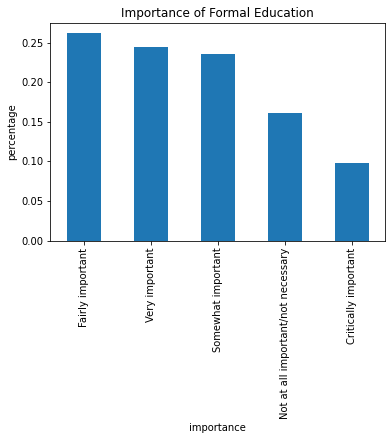

,count
importance,
Fairly important,0.261508
Very important,0.244836
Somewhat important,0.234974
Not at all important/not necessary,0.160631
Critically important,0.098050


In [7]:
gf.bar_plotting(ed_impt_df,'Importance of Formal Education',plot=True)

Create function to reassign ages in to bins containing a certain age range

In [8]:
def age_bins(age):
    if age < 10 :
        return 'Under 10 Years'
    elif age >= 10 and age < 20:
        return '10-19 Years'
    elif age >= 20 and age < 30:
        return '20-29 Years'
    elif age >= 30 and age < 40:
        return '30-39 Years'
    elif age >= 40 and age < 50:
        return '40-49 Years'
    elif age >= 50 and age < 60:
        return '50-59 Years'
    elif age >= 60 and age < 70:
        return '60-69 Years'
    elif age >= 70 and age < 80:
        return '70-79 Years'
    else:
        return 'Over 80 Years'

Create a new data frame sorted by the count of individuals in each age range

In [9]:
age_df = df['Age'].apply(age_bins).value_counts().reset_index()
age_df.rename(columns={'index':'age','Age':'count'}, inplace = True)
age_df

,age,count
0,20-29 Years,17089
1,30-39 Years,13887
2,Over 80 Years,10191
3,40-49 Years,4660
4,50-59 Years,1624
5,60-69 Years,463
6,10-19 Years,462
7,70-79 Years,87
8,Under 10 Years,2


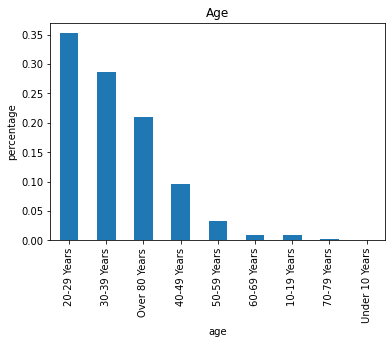

,count
age,
20-29 Years,0.352605
30-39 Years,0.286537
Over 80 Years,0.210275
40-49 Years,0.096152
50-59 Years,0.033509
60-69 Years,0.009553
10-19 Years,0.009533
70-79 Years,0.001795
Under 10 Years,0.000041


In [10]:
gf.bar_plotting(age_df,'Age',plot=True)

Add a new column to the original data frame to include the age ranges

In [11]:
df['AgeRanges']=df['Age'].apply(age_bins)
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,Country,CurrencyDesc,CurrencySymbol,DatabaseWorkedWith,DevType,...,NEWSOSites,NEWStuck,OpSys,PlatformDesireNextYear,PlatformWorkedWith,Trans,UndergradMajor,YearsCode,YearsCodePro,AgeRanges
0,1,I am a developer by profession,Yes,NaN,13,Germany,European Euro,EUR,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...",...,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,No,"Computer science, computer engineering, or sof...",36,27,Over 80 Years
1,2,I am a developer by profession,No,NaN,19,United Kingdom,Pound sterling,GBP,NaN,"Developer, full-stack;Developer, mobile",...,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,iOS;Kubernetes;Linux;MacOS,iOS,NaN,"Computer science, computer engineering, or sof...",7,4,Over 80 Years
3,4,I am a developer by profession,Yes,25.0,18,Albania,Albanian lek,ALL,NaN,NaN,...,Stack Overflow (public Q&A for anyone who code...,NaN,Linux-based,NaN,NaN,No,"Computer science, computer engineering, or sof...",7,4,20-29 Years
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,United States,NaN,NaN,MySQL;PostgreSQL;Redis;SQLite,NaN,...,Stack Overflow (public Q&A for anyone who code...,Call a coworker or friend;Visit Stack Overflow...,Windows,Docker;Google Cloud Platform;Heroku;Linux;Windows,AWS;Docker;Linux;MacOS;Windows,No,"Computer science, computer engineering, or sof...",15,8,30-39 Years
5,6,I am a developer by profession,No,NaN,14,Germany,European Euro,EUR,NaN,"Designer;Developer, front-end;Developer, mobile",...,Stack Overflow (public Q&A for anyone who code...,Play games;Visit Stack Overflow;Watch help / t...,Windows,Android,Android;Docker;WordPress,NaN,NaN,6,4,Over 80 Years


In [13]:
range_1 = gf.percentage_breakdown(df[df['AgeRanges']=='Under 10 Years'], ed_impt_resp, 'NEWEdImpt', 'Under 10 Years')
range_2 = gf.percentage_breakdown(df[df['AgeRanges']=='10-19 Years'], ed_impt_resp, 'NEWEdImpt', '10-19 Years')
range_3 = gf.percentage_breakdown(df[df['AgeRanges']=='20-29 Years'], ed_impt_resp, 'NEWEdImpt', '20-29 Years')
range_4 = gf.percentage_breakdown(df[df['AgeRanges']=='30-39 Years'], ed_impt_resp, 'NEWEdImpt', '30-39 Years')
range_5 = gf.percentage_breakdown(df[df['AgeRanges']=='40-49 Years'], ed_impt_resp, 'NEWEdImpt', '40-49 Years')
range_6 = gf.percentage_breakdown(df[df['AgeRanges']=='50-59 Years'], ed_impt_resp, 'NEWEdImpt', '50-59 Years')
range_7 = gf.percentage_breakdown(df[df['AgeRanges']=='60-69 Years'], ed_impt_resp, 'NEWEdImpt', '60-69 Years')
range_8 = gf.percentage_breakdown(df[df['AgeRanges']=='70-79 Years'], ed_impt_resp, 'NEWEdImpt', '70-79 Years')
range_9 = gf.percentage_breakdown(df[df['AgeRanges']=='Over 80 Years'], ed_impt_resp, 'NEWEdImpt', 'Over 80 Years')

In [14]:
list_of_ranges = [range_1, range_2, range_3, range_4, range_5, range_6, range_7, range_8, range_9]
top_ed_impt_resp = pd.DataFrame(columns = ['Age Range','Education Importance'])
top_ed_impt_resp = gf.add_top_per_cat(top_ed_impt_resp, list_of_ranges)

In [21]:
comp_df = pd.merge(range_1, range_2, how='outer', left_index=True, right_index=True)
comp_df.columns = ['Under 10 Years', '10-19 Years']
for x in list_of_ranges[2:]:
    comp_df[x.columns[0]] = x
comp_df['Total'] = gf.percentage_breakdown(df, ed_impt_resp, 'NEWEdImpt', 'Total')
comp_df = comp_df.sort_values(by=['Total'], ascending=False)
comp_df = comp_df.style.apply(lambda x: ['background: green' if v >= (1.5*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.25*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.75*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df

,Under 10 Years,10-19 Years,20-29 Years,30-39 Years,40-49 Years,50-59 Years,60-69 Years,70-79 Years,Over 80 Years,Total
NEWEdImpt,,,,,,,,,,
Fairly important,0.500000,0.218615,0.278542,0.258875,0.244421,0.219828,0.213823,0.195402,0.255618,0.261508
Very important,nan,0.173160,0.237989,0.231295,0.243348,0.262315,0.233261,0.206897,0.276813,0.244836
Somewhat important,0.500000,0.216450,0.242261,0.252826,0.233262,0.216133,0.205184,0.195402,0.204690,0.234974
Not at all important/not necessary,nan,0.309524,0.152145,0.167135,0.181974,0.176724,0.187905,0.218391,0.145226,0.160631
Critically important,nan,0.082251,0.089063,0.089868,0.096996,0.125000,0.159827,0.183908,0.117653,0.098050


In [22]:
top_ed_impt_resp

,Age Range,Education Importance
0,Under 10 Years,Fairly important
1,10-19 Years,Not at all important/not necessary
2,20-29 Years,Fairly important
3,30-39 Years,Fairly important
4,40-49 Years,Fairly important
5,50-59 Years,Very important
6,60-69 Years,Very important
7,70-79 Years,Not at all important/not necessary
8,Over 80 Years,Very important
